In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.decomposition import PCA

In [16]:
dataset_path = 'data/wustl_iiot_2021.csv'
df = pd.read_csv(dataset_path)

In [17]:
df.shape

(26875, 50)

In [18]:
df.drop(columns=['StartTime', 'LastTime', 'SrcAddr', 'DstAddr', 'sIpId', 'dIpId'], inplace=True)


X = df.drop(columns=['Traffic', 'Target'])
y = df['Target']

#Scaling X
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

Debug:  Index(['Unnamed: 0', 'Mean', 'Sport', 'Dport', 'SrcPkts', 'DstPkts', 'TotPkts',
       'DstBytes', 'SrcBytes', 'TotBytes', 'SrcLoad', 'DstLoad', 'Load',
       'SrcRate', 'DstRate', 'Rate', 'SrcLoss', 'DstLoss', 'Loss', 'pLoss',
       'SrcJitter', 'DstJitter', 'SIntPkt', 'DIntPkt', 'Proto', 'Dur',
       'TcpRtt', 'IdleTime', 'Sum', 'Min', 'Max', 'sDSb', 'sTtl', 'dTtl',
       'SAppBytes', 'DAppBytes', 'TotAppByte', 'SynAck', 'RunTime', 'sTos',
       'SrcJitAct', 'DstJitAct'],
      dtype='object')


In [19]:
best_score = -1
optimal_k = 1

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_X)
    score = silhouette_score(scaled_X, kmeans.labels_)
    if score > best_score:
        best_score = score
        optimal_k = k
print('Number of clusters: ', k)

Number of clusters:  10


In [35]:
inertia_values = []

# Loop over a range of k values and calculate inertia
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_X)
    inertia_values.append(kmeans.inertia_)  # Append inertia (sum of squared distances)



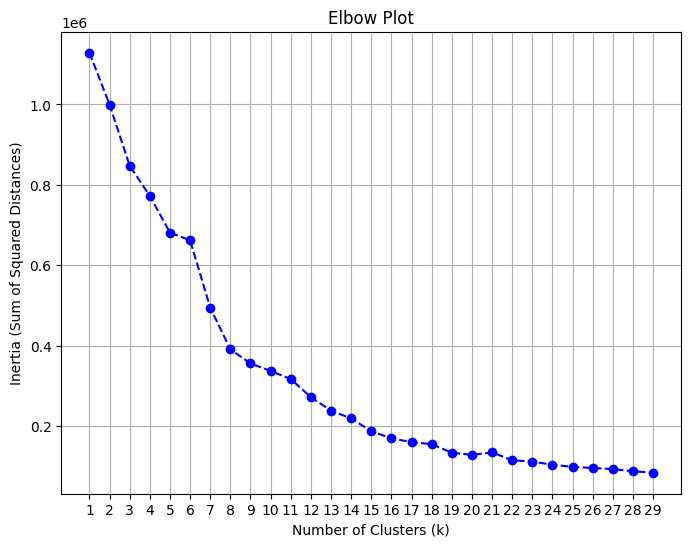

In [28]:
# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 30), inertia_values, marker='o', color='b', linestyle='--')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(range(1, 30))  # Set x-axis ticks to match k values
plt.grid(True)
plt.show()

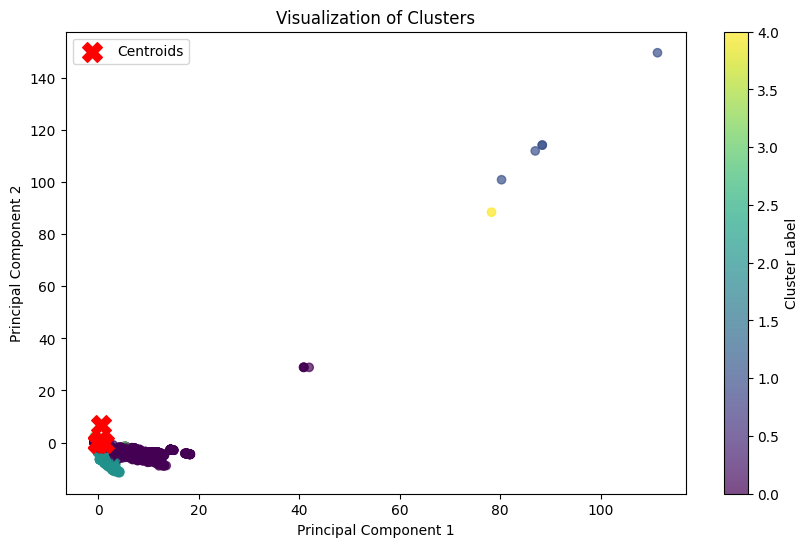

In [25]:
kmeans = KMeans(n_clusters=best_score, random_state=42)
kmeans.fit(scaled_X)
labels = kmeans.labels_

# Reduce data dimensions for visualization (if necessary)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_X)

# Plot the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Centroids')
plt.title('Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.colorbar(scatter, label='Cluster Label')
plt.show()

In [4]:
df['SrcAddr'].value_counts()

SrcAddr
192.168.0.20                 24548
209.240.235.92                 990
192.168.0.10                   668
192.168.0.44                   197
20.1.249.77                    158
49.48.134.64                   137
192.168.0.2                     86
01:80:c2:00:00:0e               54
0.0.0.0                         13
fe80::e9ed:931f:c2e0:1333       10
fe80::9bc:3b2b:78d3:855c         9
0                                5
Name: count, dtype: int64

In [5]:
df[df['SrcAddr'] == '192.168.0.20']['DstAddr'].value_counts()

DstAddr
192.168.0.2        24431
192.168.0.1           95
192.168.0.255         12
239.255.255.250        9
224.0.0.252            1
Name: count, dtype: int64

In [6]:
df[(df['SrcAddr'] == '192.168.0.20') & (df['DstAddr'] == "224.0.0.252")]["Traffic"].value_counts()

Traffic
normal    1
Name: count, dtype: int64

In [6]:
df.head()

,StartTime,LastTime,SrcAddr,DstAddr,Mean,Sport,Dport,SrcPkts,DstPkts,TotPkts,...,SAppBytes,DAppBytes,TotAppByte,SynAck,RunTime,sTos,SrcJitAct,DstJitAct,Traffic,Target
0,2019-08-19 12:23:28,2019-08-19 12:23:28,192.168.0.20,192.168.0.2,0,59034,502,10,8,18,...,24,20,44,0.001176,0.053037,0,0.000000,0.0,normal,0
1,2019-08-19 15:13:24,2019-08-19 15:13:24,192.168.0.20,192.168.0.2,0,55841,502,10,8,18,...,24,20,44,0.001308,0.052681,0,0.000000,0.0,normal,0
2,2019-08-19 13:41:31,2019-08-19 13:41:31,192.168.0.20,192.168.0.2,0,63774,502,10,8,18,...,24,20,44,0.000690,0.051793,0,0.000000,0.0,normal,0
3,2019-08-19 12:43:19,2019-08-19 12:43:20,209.240.235.92,192.168.0.2,0,61771,80,4,0,4,...,0,0,0,0.000000,0.889555,0,419.338813,0.0,DoS,1
4,2019-08-19 14:49:44,2019-08-19 14:49:48,192.168.0.20,192.168.0.1,3,0,0,14,0,14,...,476,0,476,0.000000,3.500055,0,525.146562,0.0,normal,0


In [7]:
df.sort_values(by='StartTime').head()

,StartTime,LastTime,SrcAddr,DstAddr,Mean,Sport,Dport,SrcPkts,DstPkts,TotPkts,...,SAppBytes,DAppBytes,TotAppByte,SynAck,RunTime,sTos,SrcJitAct,DstJitAct,Traffic,Target
165346,2019-08-19 09:46:03,2019-08-19 09:46:03,192.168.0.20,192.168.0.2,0,60821,502,10,8,18,...,24,20,44,0.001293,0.054280,0,0.0,0.0,normal,0
886055,2019-08-19 09:46:03,2019-08-19 09:46:03,192.168.0.20,192.168.0.2,0,60839,502,10,8,18,...,24,20,44,0.000965,0.053680,0,0.0,0.0,normal,0
839154,2019-08-19 09:46:03,2019-08-19 09:46:03,192.168.0.20,192.168.0.2,0,60825,502,6,6,12,...,24,20,44,0.000624,0.032224,0,0.0,0.0,normal,0
822422,2019-08-19 09:46:03,2019-08-19 09:46:03,192.168.0.20,192.168.0.2,0,60845,502,10,8,18,...,24,20,44,0.001247,0.054004,0,0.0,0.0,normal,0
582302,2019-08-19 09:46:03,2019-08-19 09:46:03,192.168.0.20,192.168.0.2,0,60837,502,6,6,12,...,24,20,44,0.000656,0.029514,0,0.0,0.0,normal,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194464 entries, 0 to 1194463
Data columns (total 49 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   StartTime   1194464 non-null  object 
 1   LastTime    1194464 non-null  object 
 2   SrcAddr     1194464 non-null  object 
 3   DstAddr     1194464 non-null  object 
 4   Mean        1194464 non-null  int64  
 5   Sport       1194464 non-null  int64  
 6   Dport       1194464 non-null  int64  
 7   SrcPkts     1194464 non-null  int64  
 8   DstPkts     1194464 non-null  int64  
 9   TotPkts     1194464 non-null  int64  
 10  DstBytes    1194464 non-null  int64  
 11  SrcBytes    1194464 non-null  int64  
 12  TotBytes    1194464 non-null  int64  
 13  SrcLoad     1194464 non-null  float64
 14  DstLoad     1194464 non-null  float64
 15  Load        1194464 non-null  float64
 16  SrcRate     1194464 non-null  float64
 17  DstRate     1194464 non-null  float64
 18  Rate        1194464 no

In [9]:
df.describe()

,Mean,Sport,Dport,SrcPkts,DstPkts,TotPkts,DstBytes,SrcBytes,TotBytes,SrcLoad,...,dIpId,SAppBytes,DAppBytes,TotAppByte,SynAck,RunTime,sTos,SrcJitAct,DstJitAct,Target
count,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06,...,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06,1.194464e+06
mean,1.286870e-01,5.445253e+04,7.907604e+02,1.665579e+02,1.688389e+01,1.756631e+02,7.601579e+03,1.938043e+04,2.779692e+05,1.571207e+07,...,2.956785e+04,2.192527e+02,7.051507e+03,6.581117e+05,1.801930e-03,1.994698e-01,7.531412e-03,6.189383e+01,2.653724e-01,7.284941e-02
std,6.859156e-01,1.200834e+04,3.299492e+03,5.266192e+04,1.137763e+03,5.266221e+04,7.508699e+05,4.730229e+06,1.918939e+07,8.339078e+07,...,2.027684e+04,2.852114e+03,7.445876e+05,4.167380e+07,5.485539e-02,7.966451e-01,7.442284e-01,4.143742e+02,5.001929e+00,2.598893e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,5.221800e+04,5.020000e+02,1.000000e+01,8.000000e+00,1.800000e+01,5.080000e+02,6.440000e+02,1.152000e+03,8.514543e+04,...,1.117100e+04,2.400000e+01,2.000000e+01,4.400000e+01,6.310000e-04,5.134900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,5.663500e+04,5.020000e+02,1.000000e+01,8.000000e+00,1.800000e+01,5.080000e+02,6.440000e+02,1.152000e+03,8.818777e+04,...,2.934000e+04,2.400000e+01,2.000000e+01,4.400000e+01,6.750000e-04,5.206700e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,6.104300e+04,5.020000e+02,1.000000e+01,8.000000e+00,1.800000e+01,5.080000e+02,6.440000e+02,1.152000e+03,8.968784e+04,...,4.686000e+04,2.400000e+01,2.000000e+01,4.400000e+01,8.020000e-04,5.324900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.000000e+00,2.765721e+06,6.552200e+04,2.773967e+07,3.092160e+05,2.773967e+07,8.251559e+07,2.108646e+09,2.143725e+09,1.156000e+09,...,6.553500e+04,9.979300e+04,8.182314e+07,4.293700e+09,3.036730e+00,5.103213e+00,2.070000e+02,4.999440e+03,7.695150e+02,1.000000e+00


In [10]:
df.shape

(1194464, 49)

In [31]:
df.isnull().sum().sum()

0

In [29]:
#checking for duplicates
duplicates=df[df.duplicated()]
if duplicates.empty:
  print('No duplicates found')
else:
  print('Duplicates found')
  print(duplicates)

Duplicates found
       Unnamed: 0  Mean  Sport  Dport  SrcPkts  DstPkts  TotPkts  DstBytes  \
746        740503     0  55325    502       10        8       18       508   
887        980020     0  64757    502       10        8       18       508   
1553      1119484     0  61947    502        6        6       12       384   
1654       180146     0  61259    502       10        8       18       508   
1756       199953     0  57771    502        6        6       12       386   
...           ...   ...    ...    ...      ...      ...      ...       ...   
26862      533210     0  55860    502       10        8       18       508   
26863      210868     0  49518    502       10        8       18       508   
26864      582564     0  55752    502       10        8       18       508   
26865     1020907     0  49450    502       10        8       18       508   
26866      492735     0  50382    502       10        8       18       508   

       SrcBytes  TotBytes  ...  SAppBytes  DAp

In [33]:
df.columns

0         114454
1         419868
2        1015057
3         255352
4         997514
          ...   
26870     324868
26871     570873
26872     466589
26873     116068
26874     807183
Name: Unnamed: 0, Length: 26875, dtype: int64

In [14]:
df.dtypes

StartTime      object
LastTime       object
SrcAddr        object
DstAddr        object
Mean            int64
Sport           int64
Dport           int64
SrcPkts         int64
DstPkts         int64
TotPkts         int64
DstBytes        int64
SrcBytes        int64
TotBytes        int64
SrcLoad       float64
DstLoad       float64
Load          float64
SrcRate       float64
DstRate       float64
Rate          float64
SrcLoss         int64
DstLoss         int64
Loss            int64
pLoss         float64
SrcJitter     float64
DstJitter     float64
SIntPkt       float64
DIntPkt       float64
Proto           int64
Dur           float64
TcpRtt        float64
IdleTime        int64
Sum           float64
Min           float64
Max           float64
sDSb            int64
sTtl            int64
dTtl            int64
sIpId           int64
dIpId           int64
SAppBytes       int64
DAppBytes       int64
TotAppByte      int64
SynAck        float64
RunTime       float64
sTos            int64
SrcJitAct 

In [15]:
df.select_dtypes(include = ['object']).nunique()

StartTime    25267
LastTime     25276
SrcAddr         14
DstAddr        132
Traffic          5
dtype: int64

In [16]:
#remove these columns: 'StartTime', 'LastTime', 'SrcAddr', 'DstAddr', 'sIpId', 'dIpId', 
#as they are unique to the attacks and would expose the type of the attack to the model.
#But let's keep the 'StartTime', 'LastTime' to timestamp to datastream

df.drop(columns=['SrcAddr', 'DstAddr', 'sIpId', 'dIpId'], inplace = True)

In [17]:
#We reviewed the potential features, using Argus tool [5], and chose 41 features that are common in network flows and also change during the attack phases

In [8]:
df_num_cols = df.select_dtypes(include=['float64', 'int64'])

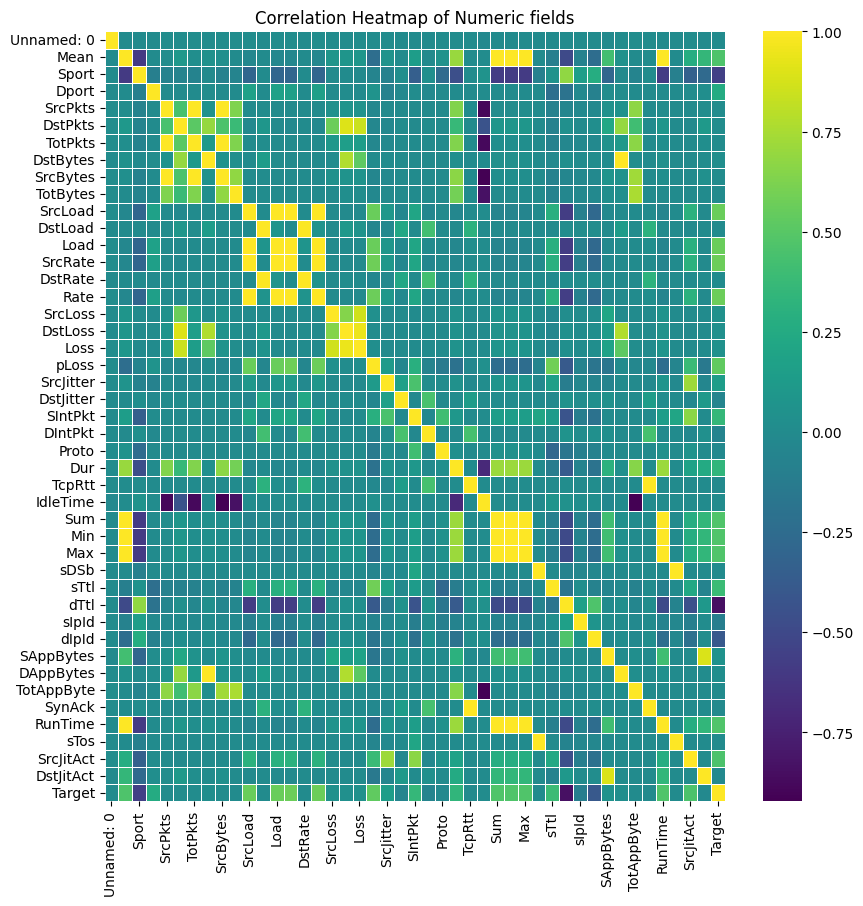

In [9]:
attack_matrix = df_num_cols.corr()
plt.figure(figsize=(10,10))
sns.heatmap(attack_matrix, annot=False, cmap='viridis', linewidths=0.5, cbar = True)
plt.title('Correlation Heatmap of Numeric fields')
plt.show()

In [10]:
attack_correlation = correlation_matrix['Target'].abs().sort_values(ascending=False)
print(attack_correlation)

NameError: name 'correlation_matrix' is not defined

In [11]:
attack_count = (df['Target'] == 1).sum()
normal_count = (df['Target'] == 0).sum()

print("Number of attacks in network trafic:", attack_count)
print("Number of normals in network trafic:", normal_count)

Number of attacks in network trafic: 1954
Number of normals in network trafic: 24921


<Figure size 1000x600 with 0 Axes>

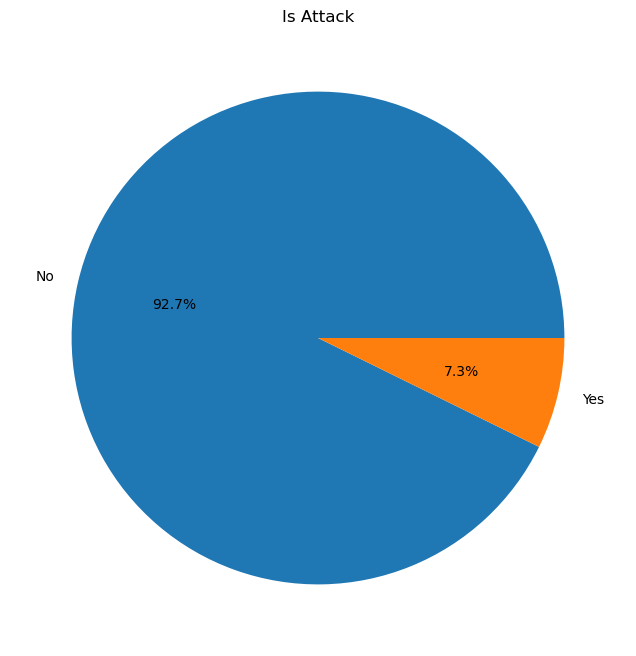

In [ ]:
#Proportion of attacks in network traffic
plt.figure(figsize = (10, 6))
is_attack_count = df['Target'].value_counts()
plt.figure(figsize = (12, 8))
plt.pie(is_attack_count, labels = ['No', 'Yes'], autopct="%0.1f%%")
plt.title('Is Attack')
plt.show()
#Conclusion: Imbalanced dataset

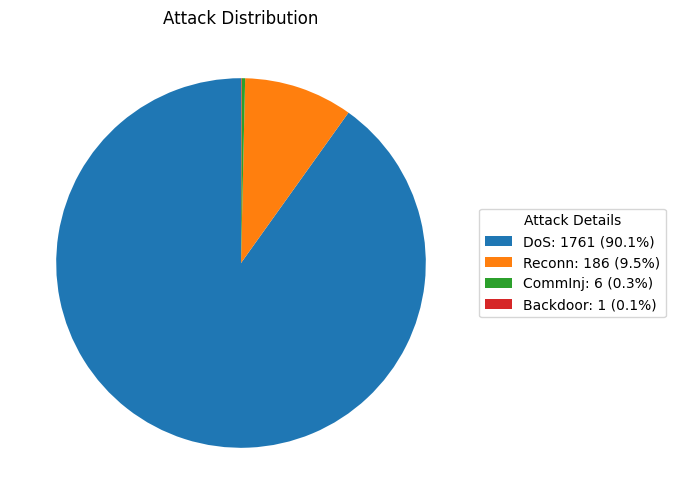

In [12]:
# Value to exclude
value_to_exclude = 'normal'

# Filter out the major value
filtered_df = df[df['Traffic'] != value_to_exclude]

category_counts = filtered_df['Traffic'].value_counts()
total_count = category_counts.sum()

legend_labels = [
    f"{category}: {count} ({count / total_count:.1%})"
    for category, count in category_counts.items()
]

# Plot the pie chart
fig, ax = plt.subplots(figsize=(6, 6))
wedges, _ = ax.pie(
    category_counts,
    labels=None,  # No labels on the chart
    startangle=90
)

# Add a legend with counts and proportions
ax.legend(
    wedges,
    legend_labels,
    title="Attack Details",
    loc="center left",
    bbox_to_anchor=(1, 0.5),  # Places legend to the right of the chart
)

# Add a title and display the plot
plt.title(f'Attack Distribution')
plt.show()